In [1]:
import pandas as pd

df = pd.read_csv("loan_default_analytics_dataset.csv")
df.head()


,CustomerID,Age,AnnualIncome,LoanAmount,LoanTenureMonths,CreditScore,EmploymentType,ExistingLoansCount,LatePaymentsLastYear,Defaulted
0,L1000,25,1790056,199284,25,627,Student,5,9,1
1,L1001,46,1883525,1373562,80,576,Self-Employed,3,5,0
2,L1002,24,2034589,980863,50,622,Student,5,6,1
3,L1003,40,1162365,93862,70,347,Salaried,5,3,1
4,L1004,44,267055,600484,38,820,Self-Employed,3,8,0


In [2]:
df.info()
df.describe()
df.isnull().sum()
df['Defaulted'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            220 non-null    object
 1   Age                   220 non-null    int64 
 2   AnnualIncome          220 non-null    int64 
 3   LoanAmount            220 non-null    int64 
 4   LoanTenureMonths      220 non-null    int64 
 5   CreditScore           220 non-null    int64 
 6   EmploymentType        220 non-null    object
 7   ExistingLoansCount    220 non-null    int64 
 8   LatePaymentsLastYear  220 non-null    int64 
 9   Defaulted             220 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 17.3+ KB


Defaulted
1    131
0     89
Name: count, dtype: int64

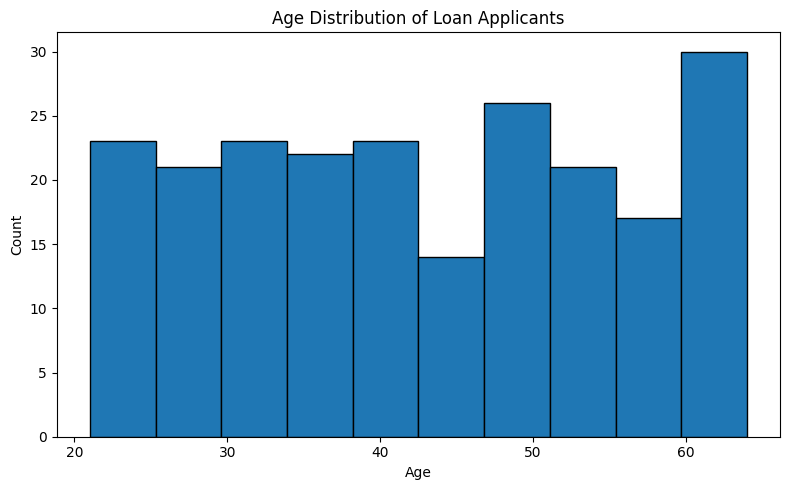

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title("Age Distribution of Loan Applicants")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


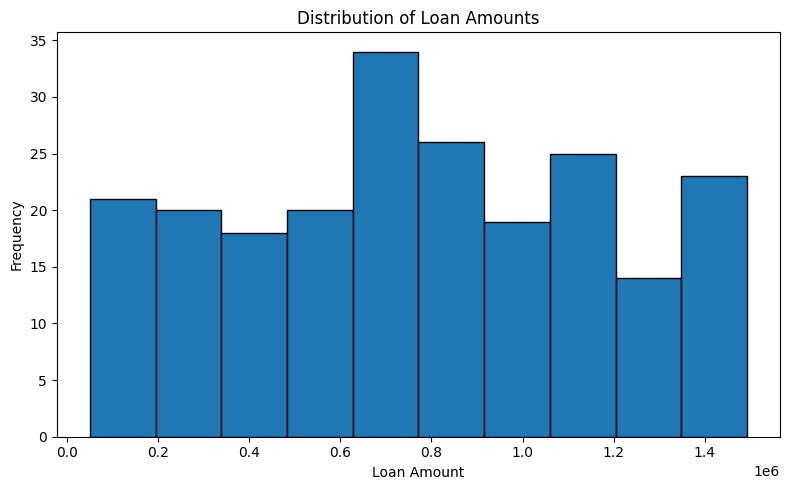

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df['LoanAmount'], bins=10, edgecolor='black')
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [6]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


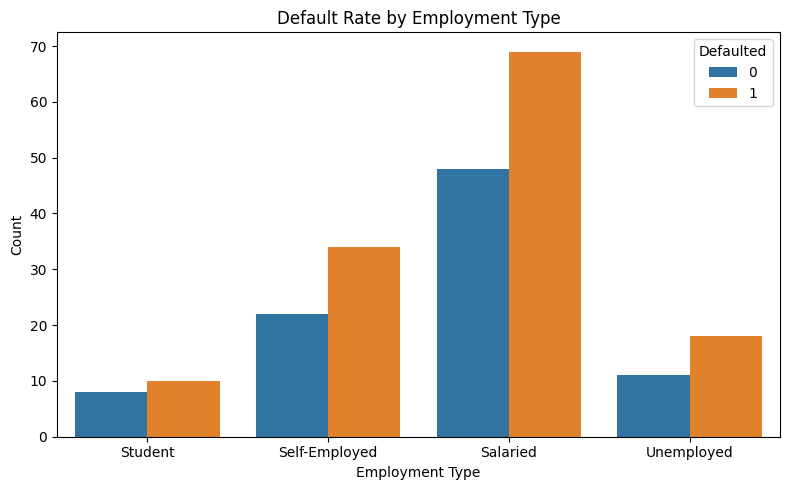

In [12]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='EmploymentType', hue='Defaulted')
plt.title("Default Rate by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

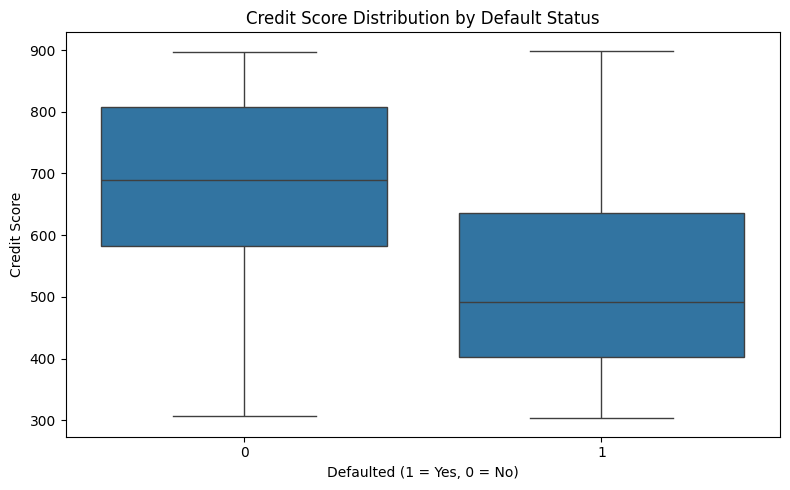

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Defaulted', y='CreditScore', data=df)
plt.title("Credit Score Distribution by Default Status")
plt.xlabel("Defaulted (1 = Yes, 0 = No)")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()


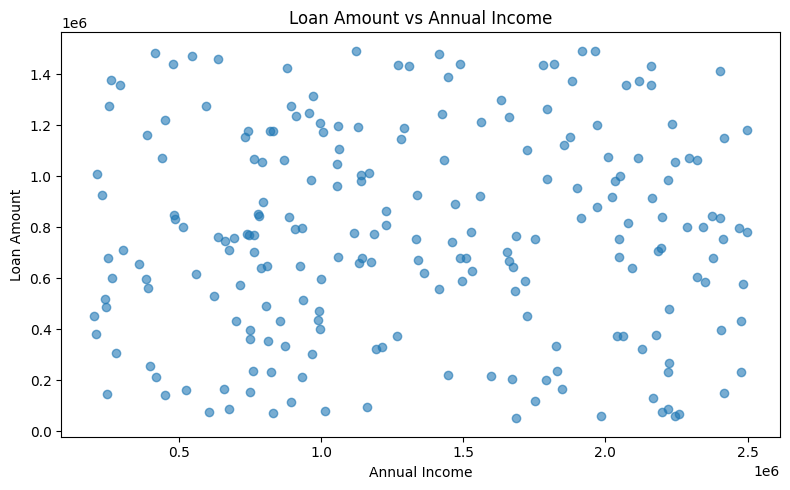

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(df['AnnualIncome'], df['LoanAmount'], alpha=0.6)
plt.title("Loan Amount vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.tight_layout()
plt.show()


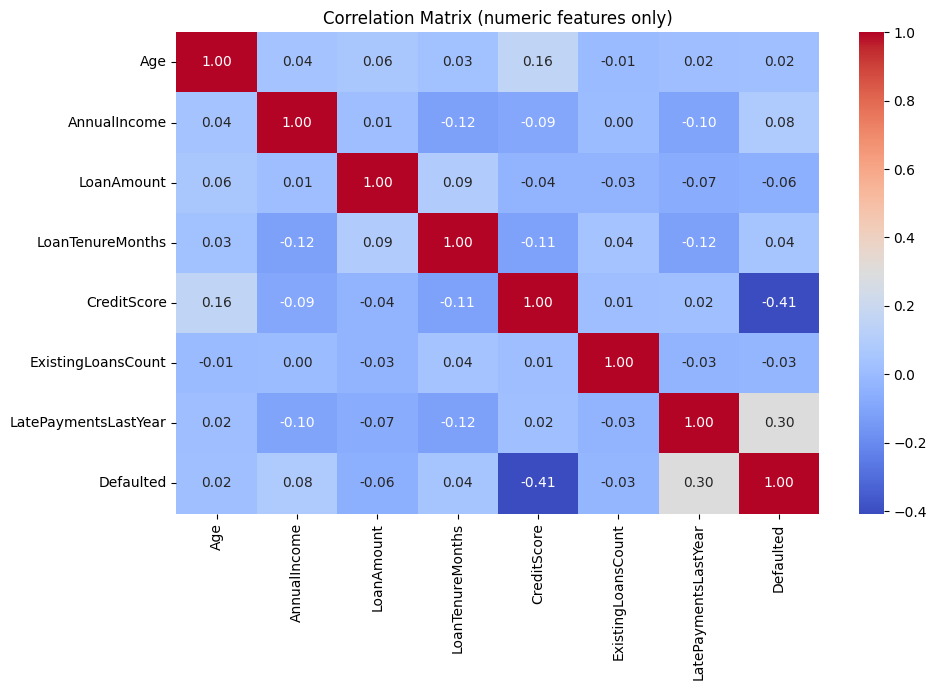

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# select numeric columns only (drops CustomerID and categorical columns)
num_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,7))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (numeric features only)")
plt.tight_layout()
plt.show()


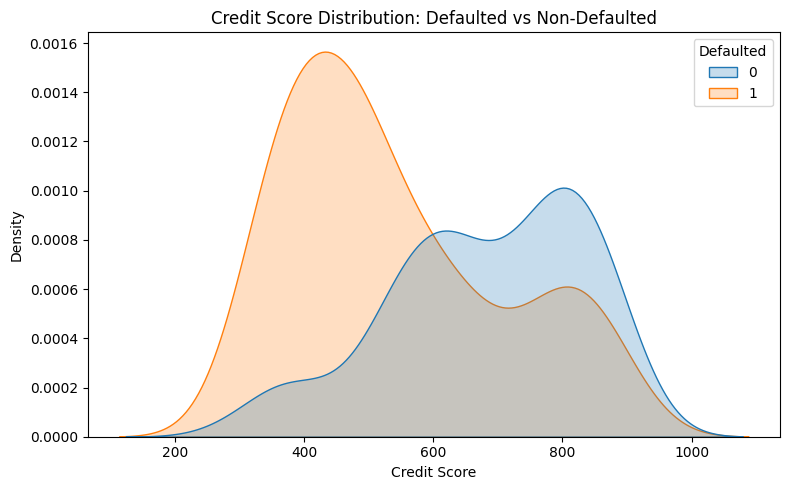

In [15]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='CreditScore', hue='Defaulted', fill=True)
plt.title("Credit Score Distribution: Defaulted vs Non-Defaulted")
plt.xlabel("Credit Score")
plt.tight_layout()
plt.show()


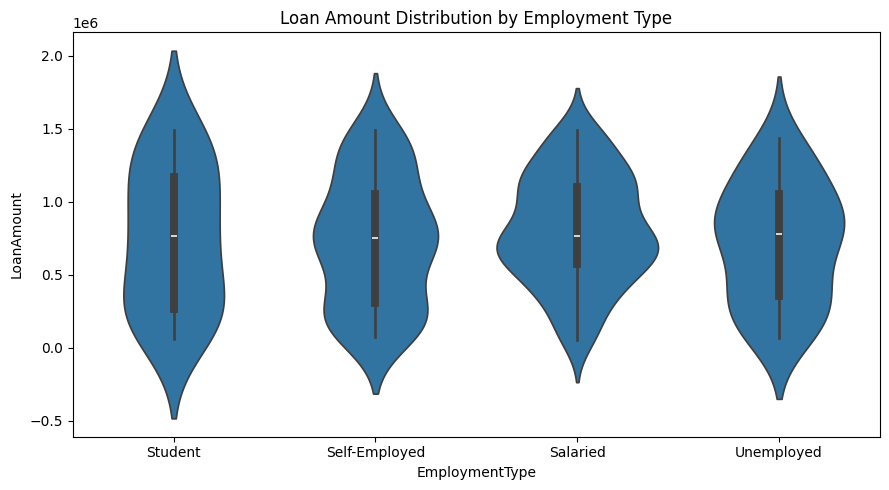

In [16]:
plt.figure(figsize=(9,5))
sns.violinplot(data=df, x='EmploymentType', y='LoanAmount')
plt.title("Loan Amount Distribution by Employment Type")
plt.tight_layout()
plt.show()


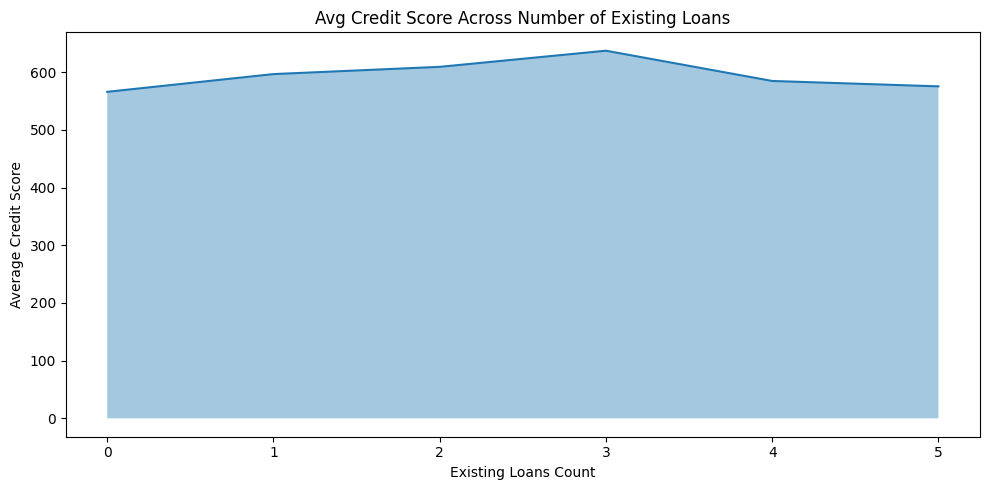

In [17]:
area_data = df.groupby('ExistingLoansCount')['CreditScore'].mean()

plt.figure(figsize=(10,5))
plt.fill_between(area_data.index, area_data.values, alpha=0.4)
plt.plot(area_data.index, area_data.values)
plt.title("Avg Credit Score Across Number of Existing Loans")
plt.xlabel("Existing Loans Count")
plt.ylabel("Average Credit Score")
plt.tight_layout()
plt.show()
